In [ ]:
from google.colab import drive

In [ ]:
import yfinance as yahooFinance
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Roic = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/CP_UNP_ROIC.xlsx')

In [ ]:
display(pd.DataFrame(Roic))

,DATE,CP_ROIC,UNP_ROIC
0,6/30/2023,0.0503,0.1175
1,3/31/2023,0.0427,0.1208
2,12/31/2022,0.0396,0.1239
3,9/30/2022,0.0356,0.1254
4,6/30/2022,0.0346,0.1224
...,...,...,...
75,9/30/2004,0.0673,0.0356
76,6/30/2004,0.0637,0.0390
77,3/31/2004,0.0640,0.0437
78,12/31/2003,0.0719,0.0484


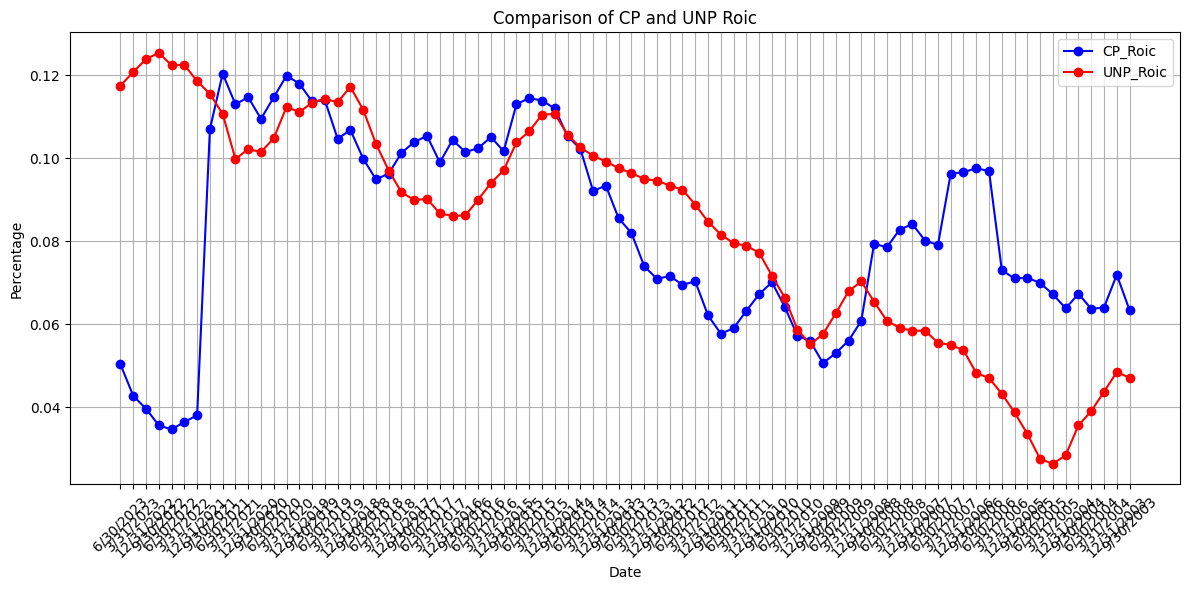

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Roic['DATE'], Roic['CP_ROIC'], label='CP_Roic', marker='o', linestyle='-', color='blue')
plt.plot(Roic['DATE'], Roic['UNP_ROIC'], label='UNP_Roic', marker='o', linestyle='-', color='red')

plt.title('Comparison of CP and UNP Roic')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
UNP_Balance_sheet = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/UNP_balance_sheet.xlsx')
UNP_Income_statement = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/UNP_income_statement.xlsx')
UNP_cash_flow_statement = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/UNP_cash_flow_statement.xlsx')

CP_Balance_sheet = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/CP_balance_sheet.xlsx')
CP_Income_statement = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/CP_income_statement.xlsx')
CP_cash_flow_statement = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/CP_cash_flow_statement.xlsx')

In [ ]:
display(pd.DataFrame(UNP_Balance_sheet))

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Assets,65968,65449,63525,62398,61673,59147,57806,55718,54600,52716,49731
1,Assets Current,4058,3952,3551,4214,3459,4163,4038,3596,4130,4679,3990
2,Cash and Cash Equivalents,1079,973,960,1799,831,1273,1275,1277,1391,1586,1432
3,Short Term Investment,0,46,46,60,60,60,90,60,0,0,0
4,Accounts Receivable,1955,1891,1722,1505,1595,1755,1493,1258,1356,1611,1414
5,Receivables Net Current,1955,1891,1722,1505,1595,1755,1493,1258,1356,1611,1414
6,Inventory,728,741,621,638,751,742,749,717,736,712,653
7,Cash Cash Equivalents Restricted Cash And Rest...,1095,987,983,1818,856,1328,0,0,0,0,0
8,Non Current Assets,61910,61497,59974,58184,58214,54984,53768,52122,50470,48037,45741
9,Property Plant And Equipment Net,57974,57710,56658,55771,55728,52679,51605,50389,48866,46272,43749


In [ ]:
display(pd.DataFrame(CP_Balance_sheet))

,Unnamed: 0,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Assets,73502,54287.00,53650.00,23640,22367,21254,20135,19221,19637.00,16640.00,17060.00
1,Assets Current,1780,1396.00,1064.00,1321,1210,1117,1274,1009,1537.00,1277.00,2029.00
2,Cash and Cash Equivalents,290,334.00,54.30,147,133,61,338,164,650.00,226.00,476.00
3,Short Term Investment,264,33254.00,-9678.20,199,0,0,0,0,0.00,371.00,387.00
4,Accounts Receivable,1029,1016.00,819.00,825,805,815,687,591,645.00,702.00,0.00
5,Receivables Net Current,1029,751.00,645.00,825,805,815,687,591,645.00,702.00,580.00
6,Inventory,285,210.00,185.00,208,182,173,152,184,188.00,177.00,165.00
7,Non Current Assets,71722,52892.00,52586.00,22319,21157,20137,18861,18212,18100.00,15363.00,15031.00
8,Property Plant And Equipment Net,22555,16535.00,16683.00,20422,19156,18406,17016,16689,16273.00,14438.00,13327.00
9,Long Term Investment,45183,33471.00,33458.00,199,341,203,182,194,15.62,96.38,86.61


In [ ]:
cash_equivalents_UNP = UNP_Balance_sheet.iloc[2, 1:]
net_debt_UNP = UNP_Balance_sheet.iloc[33, 1:]

cash_equivalents_CP = CP_Balance_sheet.iloc[2, 1:]
net_debt_CP = CP_Balance_sheet.iloc[35, 1:]

cash_equivalents_UNP = pd.to_numeric(cash_equivalents_UNP, errors='coerce')
net_debt_UNP = pd.to_numeric(net_debt_UNP, errors='coerce')

cash_equivalents_CP = pd.to_numeric(cash_equivalents_CP, errors='coerce')
net_debt_CP = pd.to_numeric(net_debt_CP, errors='coerce')

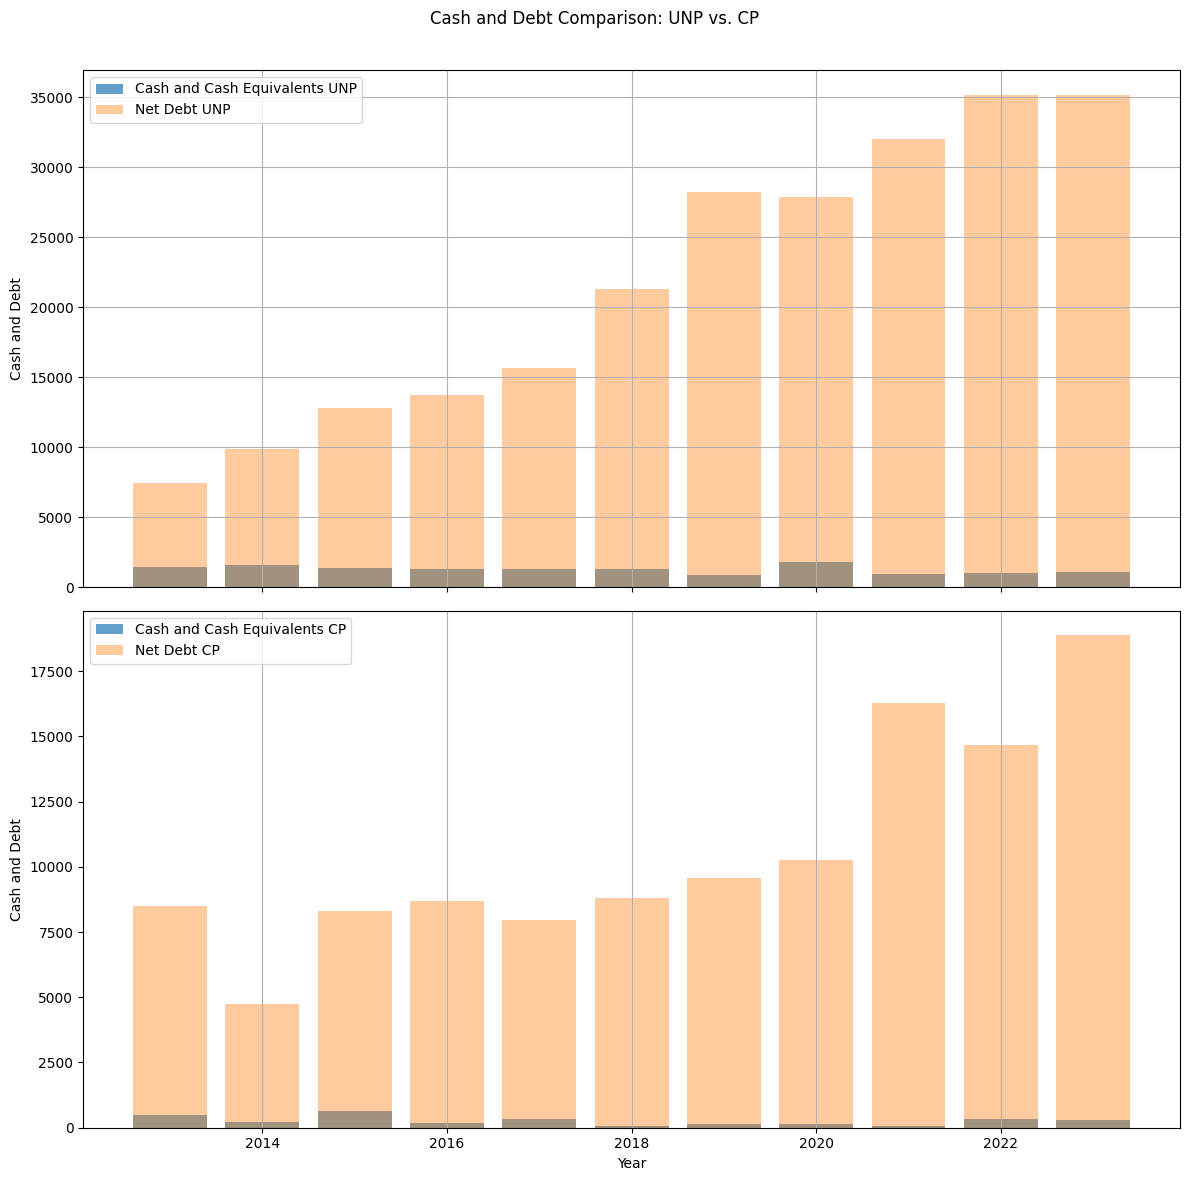

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax1.bar(UNP_Balance_sheet.columns[1:], cash_equivalents_UNP, label='Cash and Cash Equivalents UNP', alpha=0.7)
ax1.bar(UNP_Balance_sheet.columns[1:], net_debt_UNP, label='Net Debt UNP', alpha=0.4)
ax1.set_ylabel('Cash and Debt')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.bar(CP_Balance_sheet.columns[1:], cash_equivalents_CP, label='Cash and Cash Equivalents CP', alpha=0.7)
ax2.bar(CP_Balance_sheet.columns[1:], net_debt_CP, label='Net Debt CP', alpha=0.4)
ax2.set_xlabel('Year')
ax2.set_ylabel('Cash and Debt')
ax2.legend(loc='upper left')
ax2.grid(True)

plt.suptitle('Cash and Debt Comparison: UNP vs. CP')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
initial_net_debt_UNP = net_debt_UNP.iloc[-1]
final_net_debt_UNP = net_debt_UNP.iloc[0]
percentage_net_debt_increase_UNP = ((final_net_debt_UNP - initial_net_debt_UNP) / initial_net_debt_UNP) * 100

initial_net_debt_CP = net_debt_CP.iloc[-1]
final_net_debt_CP = net_debt_CP.iloc[0]
percentage_net_debt_increase_CP = ((final_net_debt_CP - initial_net_debt_CP) / initial_net_debt_CP) * 100

print(f'Percentage Increase in UNP Net Debt: {percentage_net_debt_increase_UNP:.2f}%')
print(f'Percentage Increase in CP Net Debt: {percentage_net_debt_increase_CP:.2f}%')

Percentage Increase in UNP Net Debt: 372.73%
Percentage Increase in CP Net Debt: 122.23%


In [ ]:
share_outstanding_UNP = UNP_Balance_sheet.iloc[39, 1:]
share_outstanding_UNP = pd.to_numeric(share_outstanding_UNP, errors='coerce')

share_outstanding_CP = CP_Balance_sheet.iloc[41, 1:]
share_outstanding_CP = pd.to_numeric(share_outstanding_CP, errors='coerce')

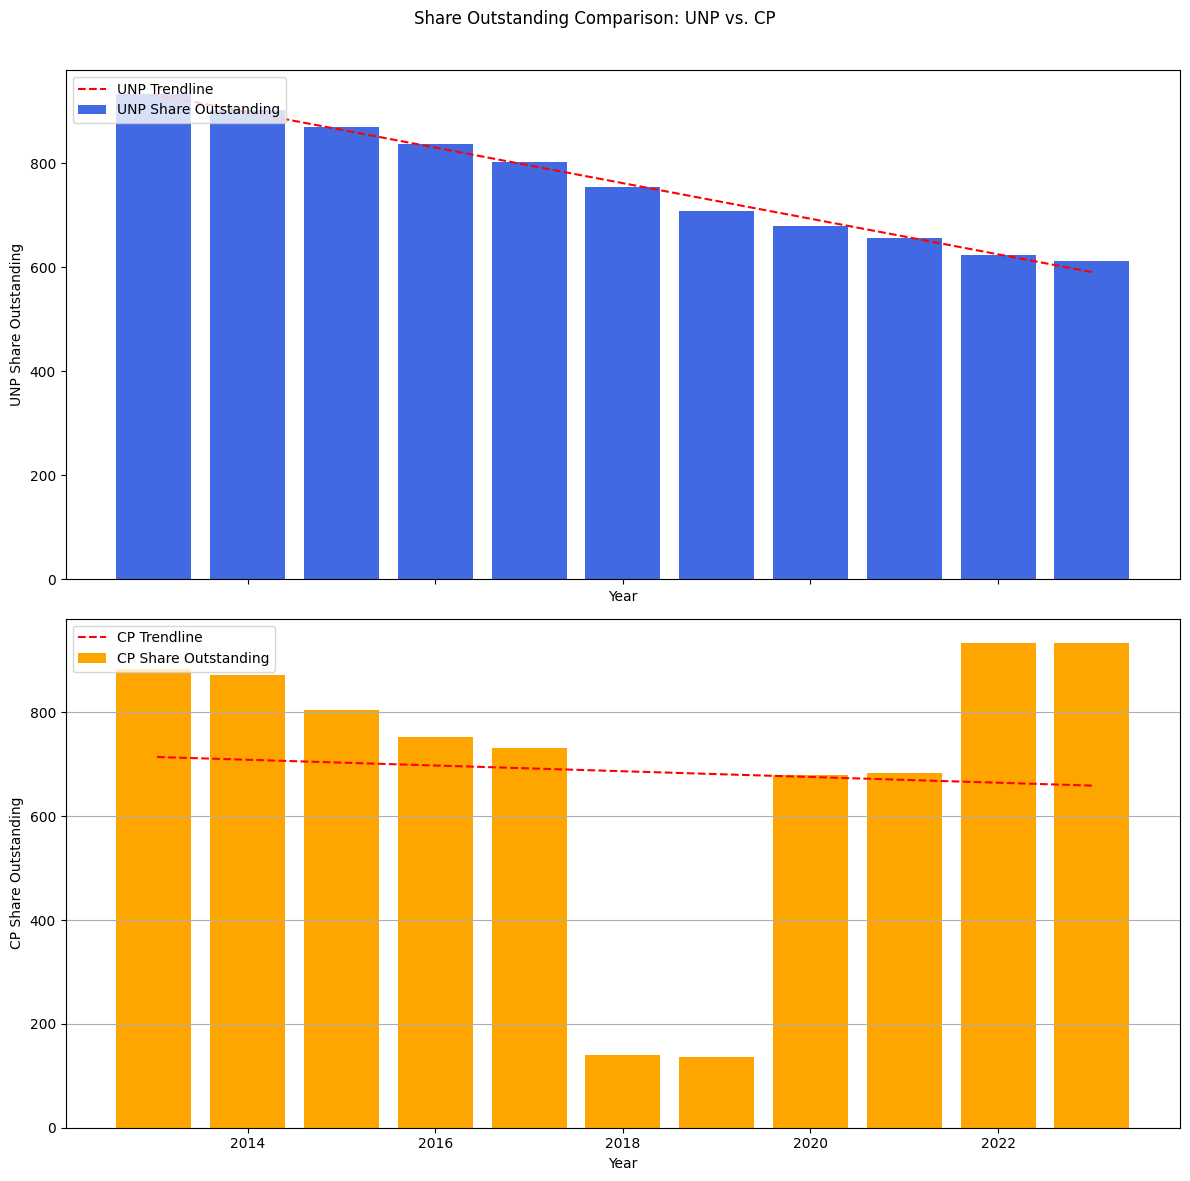

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax1.bar(UNP_Balance_sheet.columns[1:], share_outstanding_UNP, color='royalblue', label='UNP Share Outstanding')
ax1.set_xlabel('Year')
ax1.set_ylabel('UNP Share Outstanding')
ax1.legend(loc='upper left')

X1 = np.array(range(len(share_outstanding_UNP))).reshape(-1, 1)
y1 = share_outstanding_UNP
reg1 = LinearRegression().fit(X1, y1)
trendline_UNP = reg1.predict(X1)
ax1.plot(UNP_Balance_sheet.columns[1:], trendline_UNP, color='red', linestyle='--', label='UNP Trendline')
ax1.legend(loc='upper left')

ax2.bar(CP_Balance_sheet.columns[1:], share_outstanding_CP, color='orange', label='CP Share Outstanding')
ax2.set_xlabel('Year')
ax2.set_ylabel('CP Share Outstanding')
ax2.legend(loc='upper left')

X2 = np.array(range(len(share_outstanding_CP))).reshape(-1, 1)
y2 = share_outstanding_CP
reg2 = LinearRegression().fit(X2, y2)
trendline_CP = reg2.predict(X2)
ax2.plot(CP_Balance_sheet.columns[1:], trendline_CP, color='red', linestyle='--', label='CP Trendline')
ax2.legend(loc='upper left')

plt.suptitle('Share Outstanding Comparison: UNP vs. CP')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
initial_share_outstanding_UNP = share_outstanding_UNP.iloc[-1]  #  the share_outstanding series objects, not lists so cannot  access by index [0].
final_share_outstanding_UNP = share_outstanding_UNP.iloc[0]  # but with .iloc[0]      ##[0] =2023, [-1] = 2013
percentage_change_UNP = ((final_share_outstanding_UNP - initial_share_outstanding_UNP) / initial_share_outstanding_UNP) * 100

initial_share_outstanding_CP = share_outstanding_CP.iloc[-1]
final_share_outstanding_CP = share_outstanding_CP.iloc[0]
percentage_change_CP = ((final_share_outstanding_CP - initial_share_outstanding_CP) / initial_share_outstanding_CP) * 100

print(f'Percentage Decrease in UNP Share Outstanding: {percentage_change_UNP:.2f}%')
print(f'Percentage Decrease in CP Share Outstanding: {percentage_change_CP:.2f}%')


Percentage Decrease in UNP Share Outstanding: -34.33%
Percentage Decrease in CP Share Outstanding: 5.78%


In [ ]:
display(pd.DataFrame(UNP_cash_flow_statement))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Net Income/Loss,6998,6523,5349,5919,5966,10712,4233,4772,5180,4388
1,Deferred Income Tax Expense Benefit,262,154,340,566,339,-5067,831,765,895,723
2,Depreciation,2246,2208,2210,2216,2191,2105,2038,2012,1904,1777
3,Share Based Compensation,99,88,73,93,96,103,82,98,112,98
4,Changes in Working Capital Components,8,203,266,-170,-126,-127,745,-177,-309,161
5,Increase Decrease In Accounts Receivable,-169,-217,90,160,-262,-235,98,255,-197,-83
6,Net Cash Provided By Operating Activities,9362,9032,8540,8609,8686,7230,7525,7344,7385,6823
7,Capital Expenditures,3620,2936,2927,3453,3437,3257,3505,4650,4346,3496
8,Net Cash Provided By Investing Activities,-3471,-2709,-2676,-3435,-3411,-3086,-3393,-4476,-4249,-3405
9,Payments Of Dividends Common Stock,3159,2800,2626,2598,2299,1982,1879,2344,1632,1333


In [ ]:
display(pd.DataFrame(CP_cash_flow_statement))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Net Income/Loss,2768.00,2239.00,2444,2440,1951,2405,1599,1352,1476.00,875.00
1,Deferred Income Tax Expense Benefit,136.00,242.00,221,181,256,-210,320,234,354.00,212.00
2,Amortization Of Intangible Assets,3.00,3.00,3,1,1,1,1,1,1.00,0.00
3,Depreciation,672.00,637.00,779,706,696,661,640,595,552.00,565.00
4,Changes in Working Capital Components,-72.39,-51.80,-389,-26,65,-138,-55,275,-124.00,-2.00
5,Increase Decrease In Accounts Receivable,-115.67,25.12,-61,27,-107,-91,44,80,-112.00,-29.00
6,Net Cash Provided By Operating Activities,3260.00,2895.00,2802,2990,2712,2182,2089,2459,2123.00,1950.00
7,Capital Expenditures,1226.00,1203.00,1671,1647,1551,1340,1182,1522,1449.00,1236.00
8,Net Cash Provided By Investing Activities,-1496.00,-10777.25,-2030,-1803,-1458,-1295,-1069,-1123,-999.05,-1503.34
9,Payments Of Dividends Common Stock,707.00,507.00,467,412,348,310,255,226,244.00,244.00


In [ ]:
fcf_UNP = UNP_cash_flow_statement.iloc[14, 1:]
fcf_UNP = pd.to_numeric(fcf_UNP, errors='coerce')

fcf_CP = CP_cash_flow_statement.iloc[13, 1:]
fcf_CP = pd.to_numeric(fcf_CP, errors='coerce')

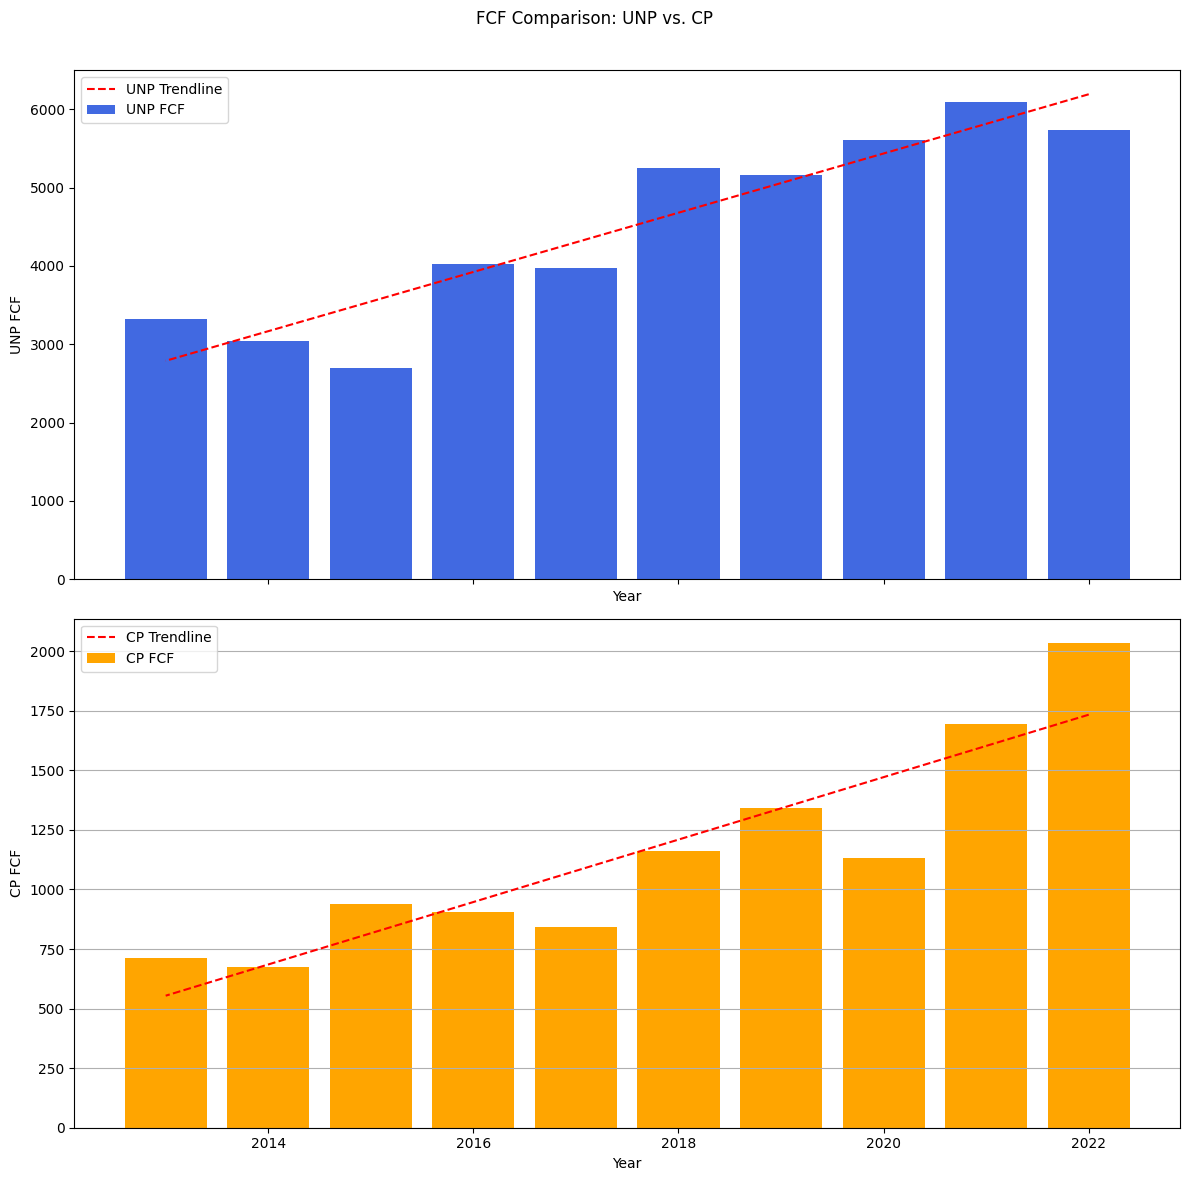

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax1.bar(UNP_cash_flow_statement.columns[1:], fcf_UNP, color='royalblue', label='UNP FCF')
ax1.set_xlabel('Year')
ax1.set_ylabel('UNP FCF')
ax1.legend(loc='upper left')

X1 = np.array(range(len(fcf_UNP))).reshape(-1, 1)
y1 = fcf_UNP
reg1 = LinearRegression().fit(X1, y1)
trendline_UNP = reg1.predict(X1)
ax1.plot(UNP_cash_flow_statement.columns[1:], trendline_UNP, color='red', linestyle='--', label='UNP Trendline')
ax1.legend(loc='upper left')

ax2.bar(CP_cash_flow_statement.columns[1:], fcf_CP, color='orange', label='CP FCF')
ax2.set_xlabel('Year')
ax2.set_ylabel('CP FCF')
ax2.legend(loc='upper left')

X2 = np.array(range(len(fcf_CP))).reshape(-1, 1)
y2 = fcf_CP
reg2 = LinearRegression().fit(X2, y2)
trendline_CP = reg2.predict(X2)
ax2.plot(CP_cash_flow_statement.columns[1:], trendline_CP, color='red', linestyle='--', label='CP Trendline')
ax2.legend(loc='upper left')

plt.suptitle('FCF Comparison: UNP vs. CP')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
initial_fcf_UNP = fcf_UNP.iloc[-1]
final_fcf_UNP = fcf_UNP.iloc[0]
percentage_fcf_change_UNP = ((final_fcf_UNP - initial_fcf_UNP) / initial_fcf_UNP) * 100

initial_fcf_CP = fcf_CP.iloc[-1]
final_fcf_CP = fcf_CP.iloc[0]
percentage_fcf_change_CP = ((final_fcf_CP - initial_fcf_CP) / initial_fcf_CP) * 100

print(f'Percentage Increase in UNP FCF: {percentage_fcf_change_UNP:.2f}%')
print(f'Percentage Increase in CP FCF: {percentage_fcf_change_CP:.2f}%')

Percentage Increase in UNP FCF: 72.59%
Percentage Increase in CP FCF: 185.01%


In [ ]:
current_liabilities_UNP = UNP_Balance_sheet.iloc[18, 1:]
current_liabilities_CP = CP_Balance_sheet.iloc[16, 1:]

current_liabilities_UNP = pd.to_numeric(current_liabilities_UNP, errors='coerce')
current_liabilities_CP = pd.to_numeric(current_liabilities_CP, errors='coerce')

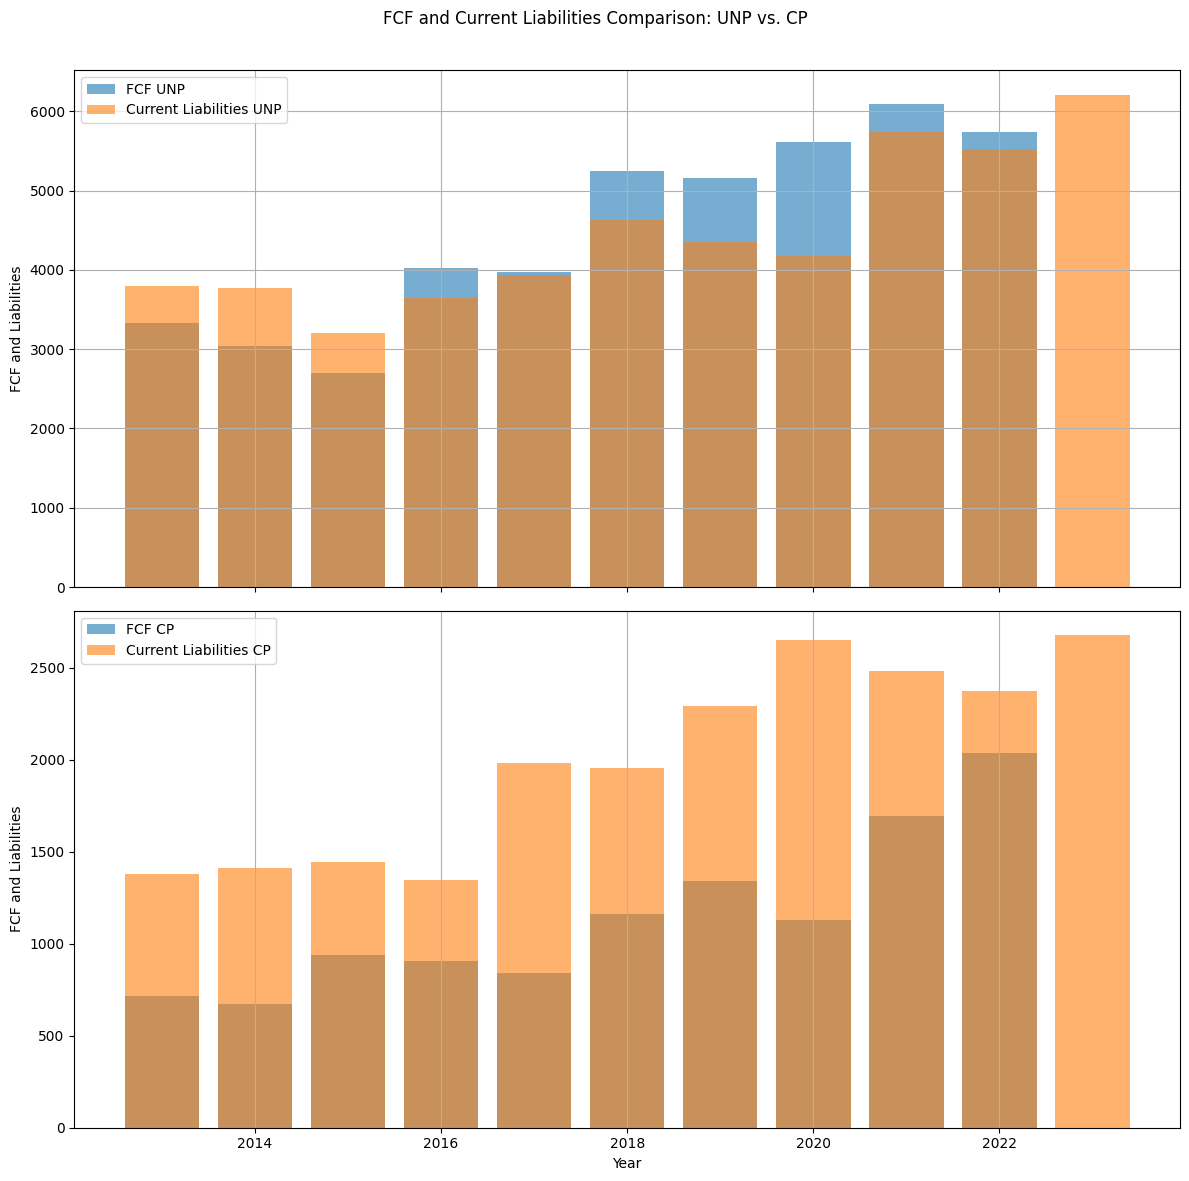

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax1.bar(UNP_cash_flow_statement.columns[1:], fcf_UNP, label='FCF UNP', alpha=0.6)
ax1.bar(UNP_Balance_sheet.columns[1:], current_liabilities_UNP, label='Current Liabilities UNP', alpha=0.6)
ax1.set_ylabel('FCF and Liabilities')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.bar(CP_cash_flow_statement.columns[1:], fcf_CP, label='FCF CP', alpha=0.6)
ax2.bar(CP_Balance_sheet.columns[1:], current_liabilities_CP, label='Current Liabilities CP', alpha=0.6)
ax2.set_xlabel('Year')
ax2.set_ylabel('FCF and Liabilities')
ax2.legend(loc='upper left')
ax2.grid(True)


plt.suptitle('FCF and Current Liabilities Comparison: UNP vs. CP')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
capital_expenditures_UNP = UNP_cash_flow_statement.iloc[7, 1:]
capital_expenditures_UNP = pd.to_numeric(capital_expenditures_UNP, errors='coerce')

capital_expenditures_CP = CP_cash_flow_statement.iloc[7, 1:]
capital_expenditures_CP = pd.to_numeric(capital_expenditures_CP, errors='coerce')

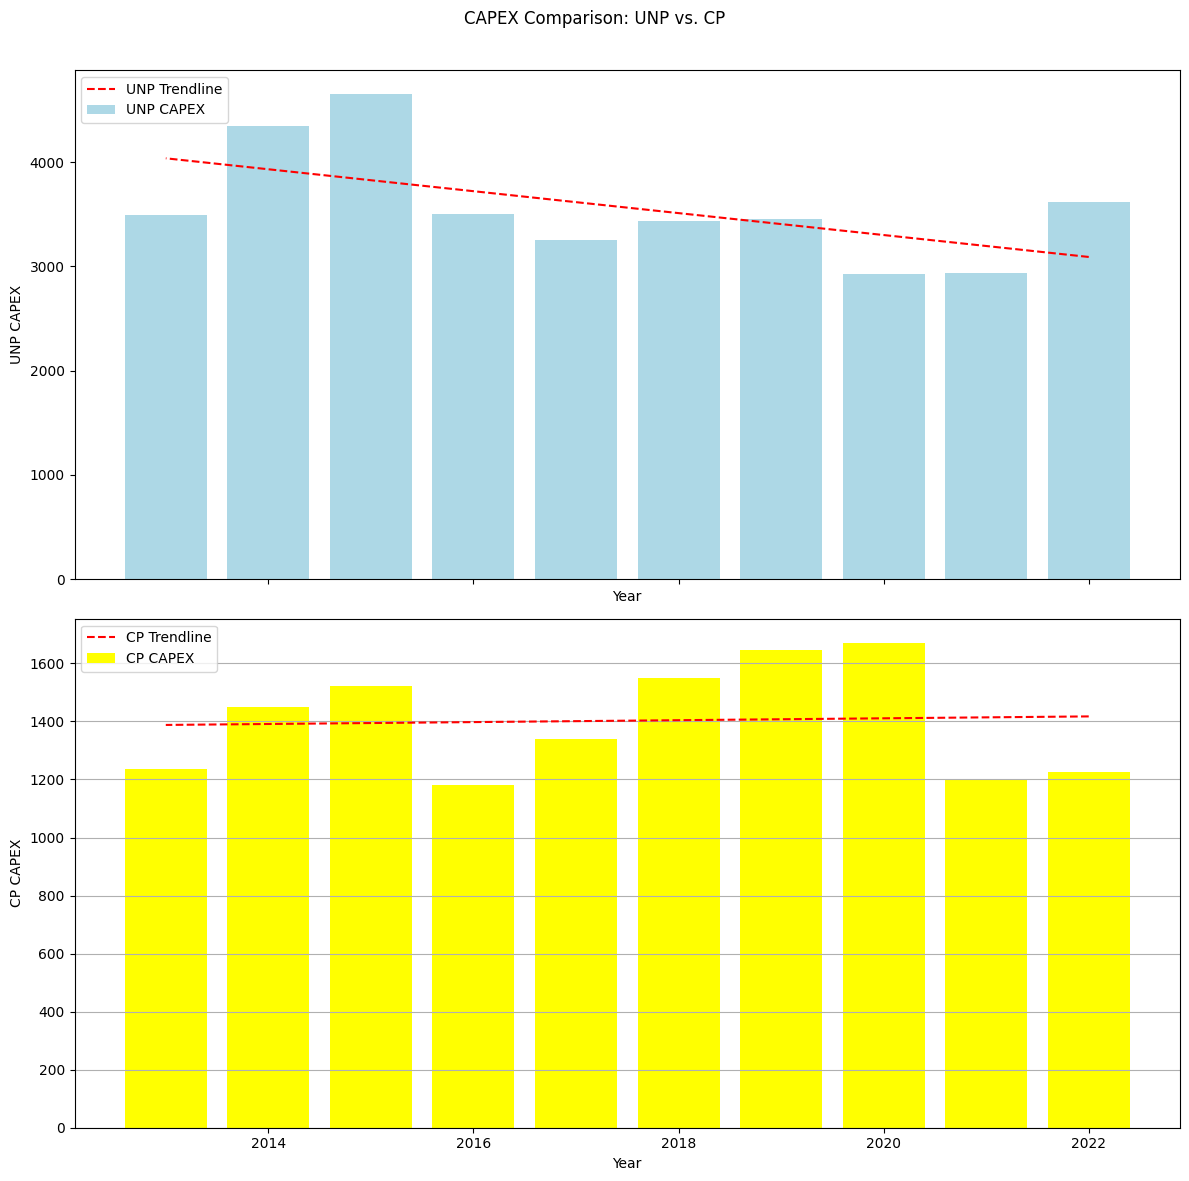

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax1.bar(UNP_cash_flow_statement.columns[1:], capital_expenditures_UNP, color='lightblue', label='UNP CAPEX')
ax1.set_xlabel('Year')
ax1.set_ylabel('UNP CAPEX')
ax1.legend(loc='upper left')

X1 = np.array(range(len(capital_expenditures_UNP))).reshape(-1, 1)
y1 = capital_expenditures_UNP
reg1 = LinearRegression().fit(X1, y1)
trendline_UNP = reg1.predict(X1)
ax1.plot(UNP_cash_flow_statement.columns[1:], trendline_UNP, color='red', linestyle='--', label='UNP Trendline')
ax1.legend(loc='upper left')

ax2.bar(CP_cash_flow_statement.columns[1:], capital_expenditures_CP, color='yellow', label='CP CAPEX')
ax2.set_xlabel('Year')
ax2.set_ylabel('CP CAPEX')
ax2.legend(loc='upper left')

X2 = np.array(range(len(capital_expenditures_CP))).reshape(-1, 1)
y2 = capital_expenditures_CP
reg2 = LinearRegression().fit(X2, y2)
trendline_CP = reg2.predict(X2)
ax2.plot(CP_cash_flow_statement.columns[1:], trendline_CP, color='red', linestyle='--', label='CP Trendline')
ax2.legend(loc='upper left')

plt.suptitle('CAPEX Comparison: UNP vs. CP')
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
initial_capex_UNP = capital_expenditures_UNP.iloc[-1]
final_capex_UNP = capital_expenditures_UNP.iloc[0]
percentage_capex_change_UNP = ((final_capex_UNP - initial_capex_UNP) / initial_capex_UNP) * 100

initial_capex_CP = capital_expenditures_CP.iloc[-1]
final_capex_CP = capital_expenditures_CP.iloc[0]
percentage_capex_change_CP = ((final_capex_CP - initial_capex_CP) / initial_capex_CP) * 100

print(f'Percentage Change in UNP CAPEX: {percentage_capex_change_UNP:.2f}%')
print(f'Percentage Change in CP CAPEX: {percentage_capex_change_CP:.2f}%')

Percentage Change in UNP CAPEX: 3.55%
Percentage Change in CP CAPEX: -0.81%


In [ ]:
display(pd.DataFrame(UNP_Income_statement))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Revenue,24875.00,21804.00,19533.00,21708.00,22832.00,21240.00,19941.00,21813.00,23988.00,21963.00
1,Cost Of Revenue,13670.00,11290.00,10354.00,12094.00,13293.00,12231.00,11672.00,12837.00,14311.00,13668.00
2,Gross Profit,11205.00,10514.00,9179.00,9614.00,9539.00,9009.00,8269.00,8976.00,9677.00,8295.00
3,Gross Profit Margin %,45.05,48.23,47.00,44.29,41.78,42.42,41.47,41.15,40.35,37.77
4,Operating Expenses,1288.00,1176.00,1345.00,1060.00,1022.00,948.00,997.00,924.00,924.00,849.00
5,Selling General And Administrative Expense,5543.00,5017.00,5338.00,5593.00,6078.00,5932.00,5747.00,6085.00,6000.00,5656.00
6,Depreciation And Amortization,2672.00,2208.00,2210.00,2216.00,2191.00,2105.00,2038.00,2012.00,1904.00,1777.00
7,Operating Income/Loss,9917.00,9338.00,7834.00,8554.00,8517.00,8061.00,7272.00,8052.00,8753.00,7446.00
8,Operating Margin %,39.87,42.83,40.11,39.41,37.31,37.96,36.47,36.92,36.49,33.91
9,Nonoperating Income Expense,426.00,297.00,287.00,243.00,94.00,290.00,192.00,226.00,151.00,128.00


In [ ]:
display(pd.DataFrame(CP_Income_statement))

,Unnamed: 0,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Revenue,6936.00,6276.00,7710.00,7792.00,7316.00,6554.00,6232.00,6712.00,6620.00,6133.00
1,Cost Of Revenue,3324.00,2804.00,3349.00,3475.00,3413.00,2979.00,2749.00,3032.00,3300.00,3409.00
2,Gross Profit,3613.00,3473.00,4361.00,4317.00,3903.00,3575.00,3483.00,3680.00,3320.00,2724.00
3,Gross Profit Margin %,52.09,55.34,56.57,55.41,53.35,54.55,55.89,54.83,50.16,44.42
4,Operating Expenses,994.00,957.00,1050.00,1193.00,1072.00,1056.00,905.00,1060.00,985.00,876.00
5,Selling General And Administrative Expense,0.00,957.00,1050.00,1193.00,1072.00,1056.00,905.00,1060.00,985.00,876.00
6,Depreciation And Amortization,853.00,637.00,779.00,706.00,696.00,661.00,640.00,595.00,552.00,565.00
7,Operating Income/Loss,3775.00,2517.00,3311.00,3124.00,2831.00,2519.00,2578.00,2688.00,2339.00,1420.00
8,Operating Margin %,54.43,40.11,42.95,40.10,38.70,38.44,41.37,40.05,35.34,23.16
9,Nonoperating Income Expense,0.00,0.00,0.00,89.00,-174.00,178.00,45.00,-335.00,-19.00,-17.00


In [ ]:
revenue_UNP = UNP_Income_statement.iloc[0, 1:]
cost_of_revenue_UNP = UNP_Income_statement.iloc[1, 1:]
gross_profit_margin_UNP = UNP_Income_statement.iloc[3, 1:]
revenue_UNP = pd.to_numeric(revenue_UNP, errors='coerce')
cost_of_revenue_UNP = pd.to_numeric(cost_of_revenue_UNP, errors='coerce')
gross_profit_margin_UNP = pd.to_numeric(gross_profit_margin_UNP, errors='coerce')

revenue_CP = CP_Income_statement.iloc[0, 1:]
cost_of_revenue_CP = CP_Income_statement.iloc[1, 1:]
gross_profit_margin_CP = CP_Income_statement.iloc[3, 1:]
revenue_CP = pd.to_numeric(revenue_CP, errors='coerce')
cost_of_revenue_CP = pd.to_numeric(cost_of_revenue_CP, errors='coerce')
gross_profit_margin_CP = pd.to_numeric(gross_profit_margin_CP, errors='coerce')

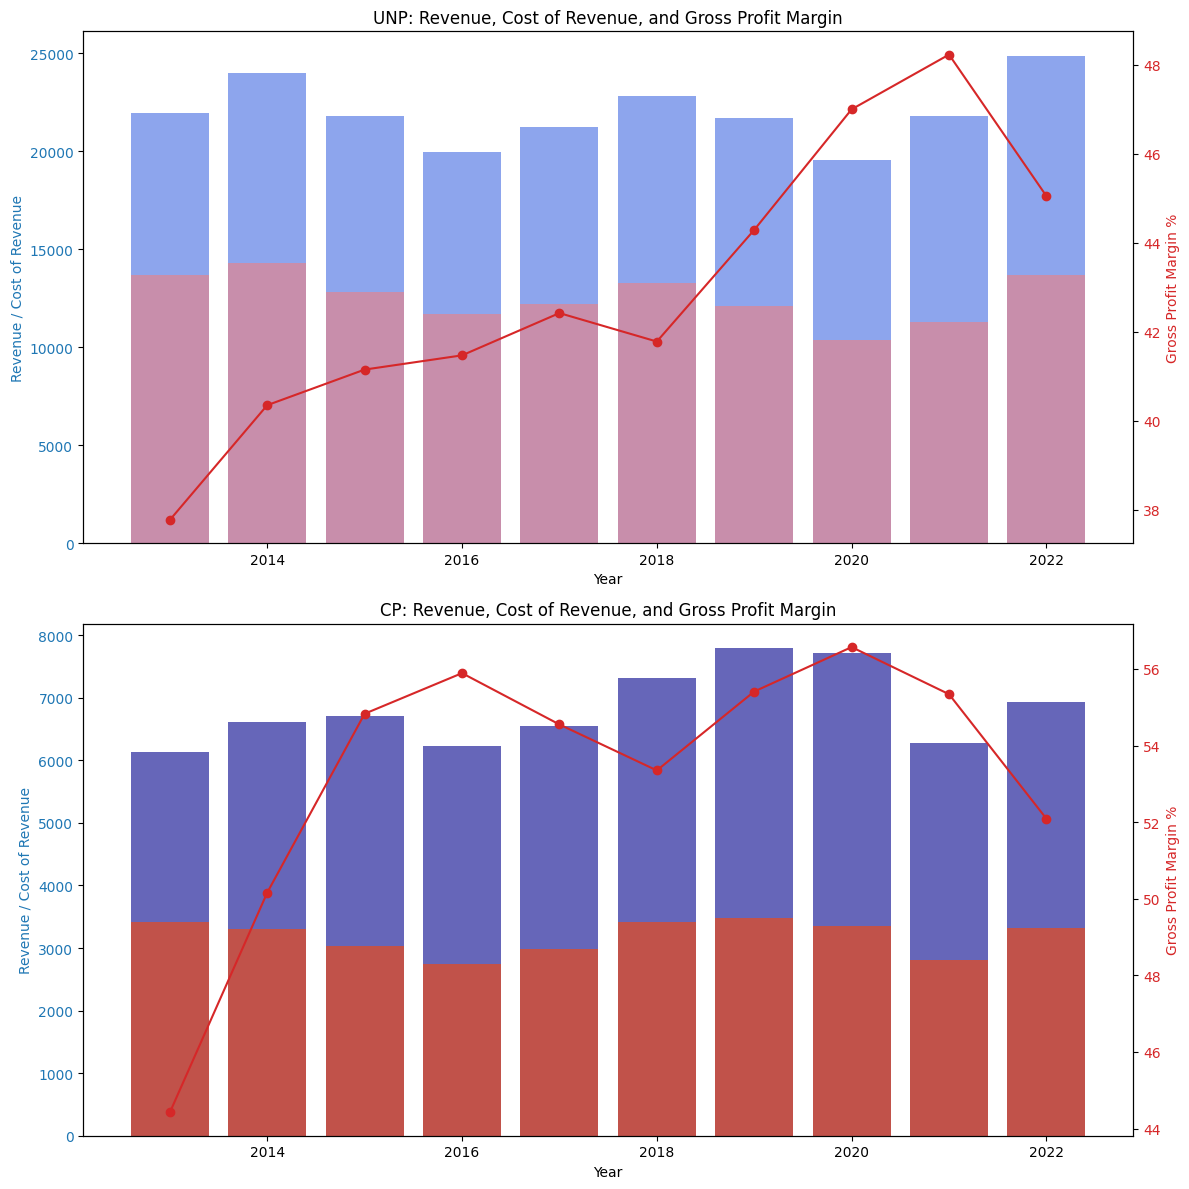

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue / Cost of Revenue', color='tab:blue')
ax1.bar(UNP_Income_statement.columns[1:], revenue_UNP, color='royalblue', label='Revenue UNP', alpha=0.6)
ax1.bar(UNP_Income_statement.columns[1:], cost_of_revenue_UNP, color='lightcoral', label='Cost of Revenue UNP', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2_1 = ax1.twinx()
ax2_1.set_ylabel('Gross Profit Margin %', color='tab:red')
ax2_1.plot(UNP_Income_statement.columns[1:], gross_profit_margin_UNP, color='tab:red', marker='o', label='Gross Profit Margin % UNP')
ax2_1.tick_params(axis='y', labelcolor='tab:red')

ax1.set_title('UNP: Revenue, Cost of Revenue, and Gross Profit Margin')


ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue / Cost of Revenue', color='tab:blue')
ax2.bar(CP_Income_statement.columns[1:], revenue_CP, color='darkblue', label='Revenue CP', alpha=0.6)
ax2.bar(CP_Income_statement.columns[1:], cost_of_revenue_CP, color='orangered', label='Cost of Revenue CP', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax2_2 = ax2.twinx()
ax2_2.set_ylabel('Gross Profit Margin %', color='tab:red')
ax2_2.plot(CP_Income_statement.columns[1:], gross_profit_margin_CP, color='tab:red', marker='o', label='Gross Profit Margin % CP')
ax2_2.tick_params(axis='y', labelcolor='tab:red')

ax2.set_title('CP: Revenue, Cost of Revenue, and Gross Profit Margin')

plt.tight_layout()
plt.show()

In [ ]:
#revenue
revenue_UNP = UNP_Income_statement.iloc[0, 1:]
revenue_UNP = pd.to_numeric(revenue_UNP, errors='coerce')

revenue_CP = CP_Income_statement.iloc[0, 1:]
revenue_CP = pd.to_numeric(revenue_CP, errors='coerce')

In [ ]:
initial_revenue_UNP = revenue_UNP.iloc[-1]
final_revenue_UNP = revenue_UNP.iloc[0]
percentage_rev_change_UNP = ((final_revenue_UNP - initial_revenue_UNP) / initial_revenue_UNP) * 100

initial_revenue_CP = revenue_CP.iloc[-1]
final_revenue_CP = revenue_CP.iloc[0]
percentage_rev_change_CP = ((final_revenue_CP - initial_revenue_CP) / initial_revenue_CP) * 100

print(f'Percentage Change in UNP CAPEX: {percentage_rev_change_UNP:.2f}%')
print(f'Percentage Change in CP CAPEX: {percentage_rev_change_CP:.2f}%')

Percentage Change in UNP CAPEX: 13.26%
Percentage Change in CP CAPEX: 13.09%


In [ ]:
income_UNP = UNP_Income_statement.iloc[17, 1:]
operating_margin_UNP = UNP_Income_statement.iloc[8, 1:]
income_UNP = pd.to_numeric(income_UNP, errors='coerce')
operating_margin_UNP = pd.to_numeric(operating_margin_UNP, errors='coerce')

income_CP = CP_Income_statement.iloc[17, 1:]
operating_margin_CP = CP_Income_statement.iloc[8, 1:]
income_CP = pd.to_numeric(income_CP, errors='coerce')
operating_margin_CP = pd.to_numeric(operating_margin_CP, errors='coerce')

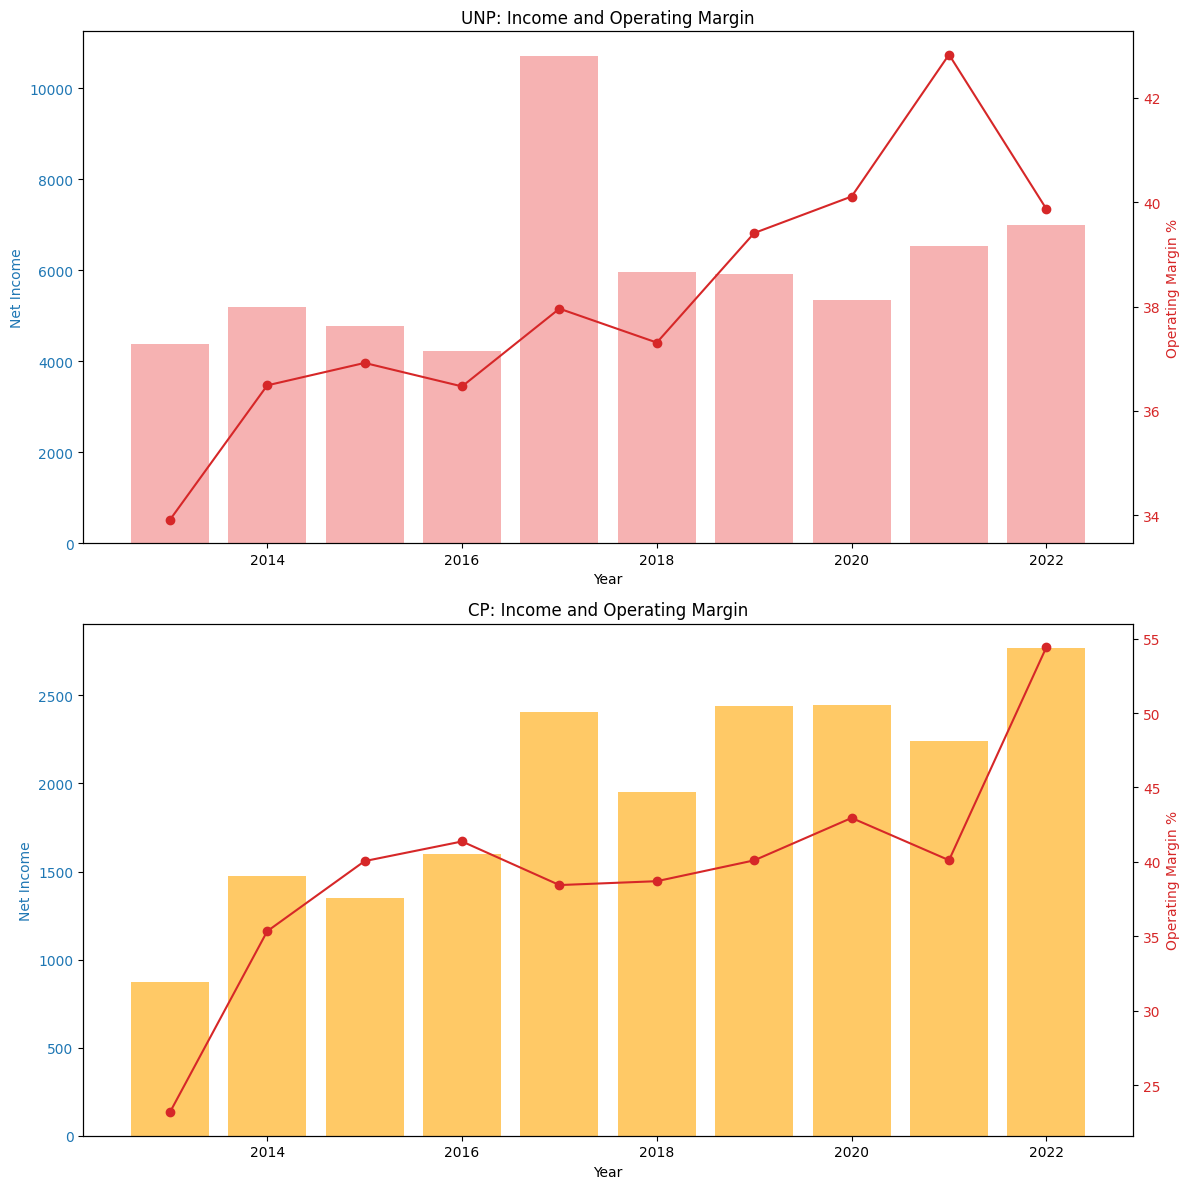

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.set_xlabel('Year')
ax1.set_ylabel('Net Income', color='tab:blue')
ax1.bar(UNP_Income_statement.columns[1:], income_UNP, color='lightcoral', label='Income UNP', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2_1 = ax1.twinx()
ax2_1.set_ylabel('Operating Margin %', color='tab:red')
ax2_1.plot(UNP_Income_statement.columns[1:], operating_margin_UNP, color='tab:red', marker='o', label='Operating Margin % UNP')
ax2_1.tick_params(axis='y', labelcolor='tab:red')

ax1.set_title('UNP: Income and Operating Margin')


ax2.set_xlabel('Year')
ax2.set_ylabel('Net Income', color='tab:blue')
ax2.bar(CP_Income_statement.columns[1:], income_CP, color='orange', label='Income CP', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax2_2 = ax2.twinx()
ax2_2.set_ylabel('Operating Margin %', color='tab:red')
ax2_2.plot(CP_Income_statement.columns[1:], operating_margin_CP, color='tab:red', marker='o', label='Operating Margin % CP')
ax2_2.tick_params(axis='y', labelcolor='tab:red')

ax2.set_title('CP: Income and Operating Margin')

plt.tight_layout()
plt.show()

In [ ]:
initial_income_UNP = income_UNP.iloc[-1]
final_income_UNP = income_UNP.iloc[0]
percentage_income_change_UNP = ((final_income_UNP - initial_income_UNP) / initial_income_UNP) * 100

initial_income_CP = income_CP.iloc[-1]
final_income_CP = income_CP.iloc[0]
percentage_income_change_CP = ((final_income_CP - initial_income_CP) / initial_income_CP) * 100

print(f'Percentage Change in UNP Income: {percentage_income_change_UNP:.2f}%')
print(f'Percentage Change in CP Income: {percentage_income_change_CP:.2f}%')

Percentage Change in UNP Income: 59.48%
Percentage Change in CP Income: 216.34%


In [ ]:
interest_UNP = UNP_Income_statement.iloc[10, 1:]
interest_UNP = pd.to_numeric(interest_UNP, errors='coerce')

interest_CP = CP_Income_statement.iloc[10, 1:]
interest_CP = pd.to_numeric(interest_CP, errors='coerce')

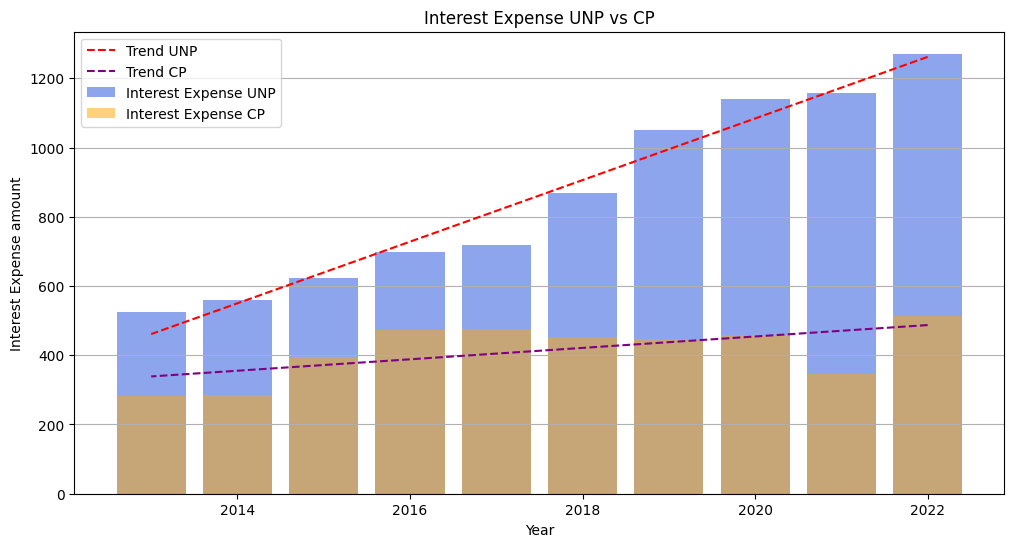

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(UNP_Income_statement.columns[1:], interest_UNP, color='royalblue', label='Interest Expense UNP',alpha=0.6)
plt.bar(CP_Income_statement.columns[1:], interest_CP, color='orange', label='Interest Expense CP',alpha=0.5)

X1 = np.array(range(len(interest_UNP))).reshape(-1, 1)
y1 = interest_UNP.values
reg1 = LinearRegression().fit(X1, y1)
trendline1 = reg1.predict(X1)

X2 = np.array(range(len(interest_CP))).reshape(-1, 1)
y2 = interest_CP.values
reg2 = LinearRegression().fit(X2, y2)
trendline2 = reg2.predict(X2)

plt.plot(UNP_Income_statement.columns[1:], trendline1, color='red', linestyle='--', label='Trend UNP')
plt.plot(CP_Income_statement.columns[1:], trendline2, color='purple', linestyle='--', label='Trend CP')


plt.title('Interest Expense UNP vs CP')
plt.xlabel('Year')
plt.ylabel('Interest Expense amount')
plt.grid(axis='y')
plt.legend()
plt.show()

In [ ]:
initial_interest_UNP = interest_UNP.iloc[-1]
final_interest_UNP = interest_UNP.iloc[0]
percentage_interest_change_UNP = ((final_interest_UNP - initial_interest_UNP) / initial_interest_UNP) * 100

initial_interest_CP = interest_CP.iloc[-1]
final_interest_CP = interest_CP.iloc[0]
percentage_interest_change_CP = ((final_interest_CP - initial_interest_CP) / initial_interest_CP) * 100

print(f'Percentage Change in UNP Interest Expenses: {percentage_interest_change_UNP:.2f}%')
print(f'Percentage Change in CP Interest Expenses: {percentage_interest_change_CP:.2f}%')

Percentage Change in UNP Interest Expenses: 141.63%
Percentage Change in CP Interest Expenses: 81.63%


In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving UNP_railway_network.png to UNP_railway_network.png


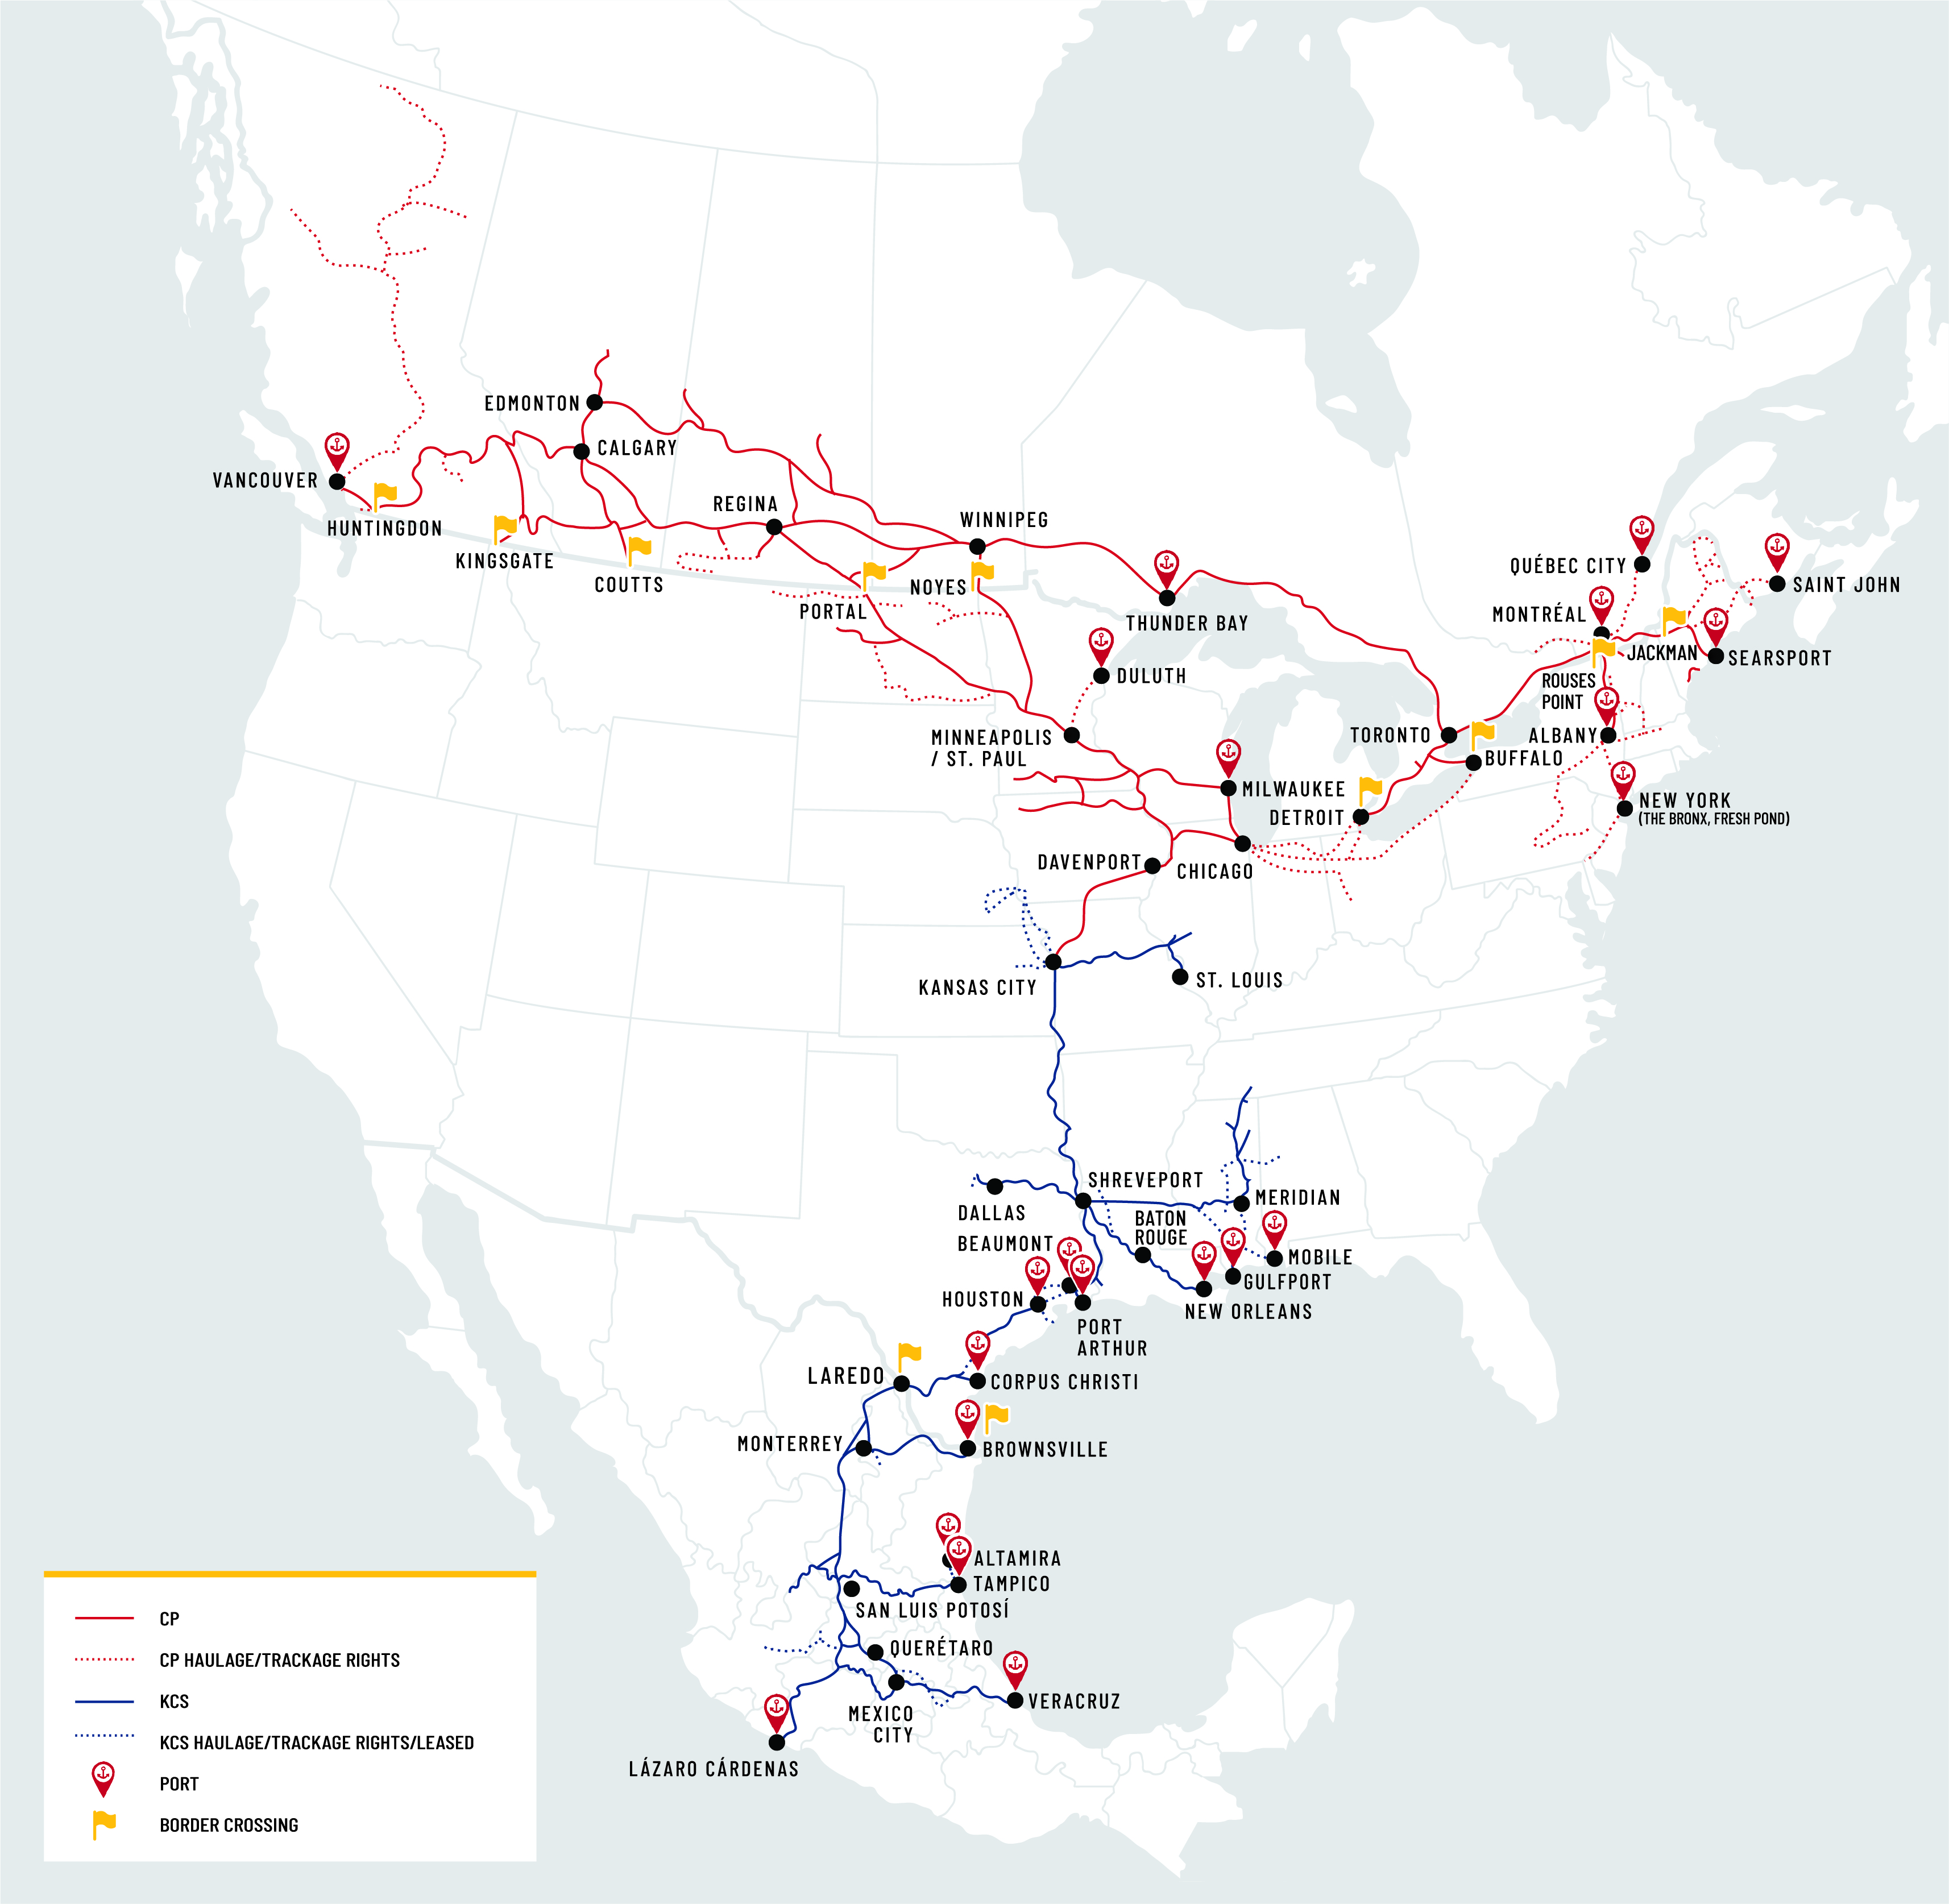

In [ ]:
Image('Canadian_Pacific_railways.png')

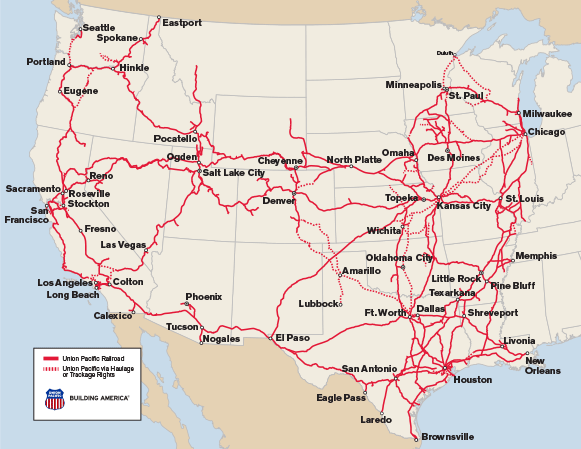

In [3]:
Image('UNP_railway_network.png')